In [11]:
!pip install catboost

In [13]:
!pip install category_encoders

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

In [18]:
!pip install xgboost

In [20]:
!pip install lightgbm

In [22]:
data=pd.read_csv('heart.csv')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [24]:
data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [26]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [30]:
X=data.drop('target', axis=1)
Y = data['target']

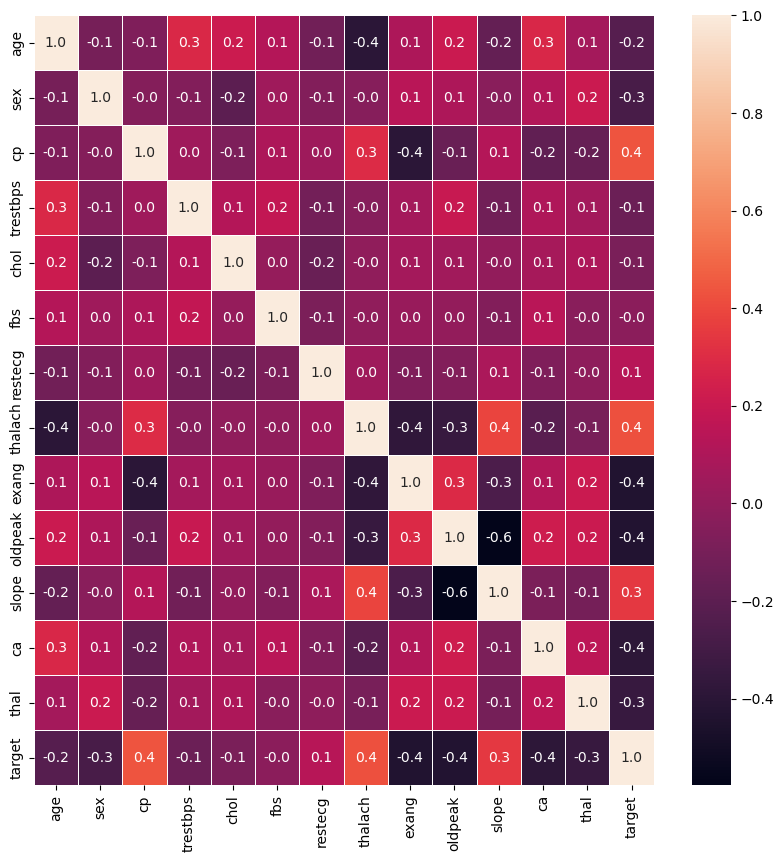

In [32]:
# Convert non-numeric columns to numeric format
data_numeric = data.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Compute the correlation matrix
corr_matrix = data_numeric.corr()

# Plot the heatmap
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.1f', ax=ax)
plt.show()


In [34]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [36]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [38]:
print(X.shape)
print(Y.shape)

(303, 13)
(303,)


In [40]:
xtrain,xtest,ytrain, ytest= train_test_split(X,Y, test_size=0.2, random_state=0)


In [42]:
from sklearn.pipeline import Pipeline

In [44]:
from sklearn.preprocessing import StandardScaler


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [48]:
LR_model = LogisticRegression(fit_intercept=True)
DT_model=DecisionTreeClassifier(max_depth=5, random_state=1)
RFC_model = RandomForestClassifier(n_estimators = 100)
KNN_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
SVM_model = svm.SVC()

**Logistic Regression:**





/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


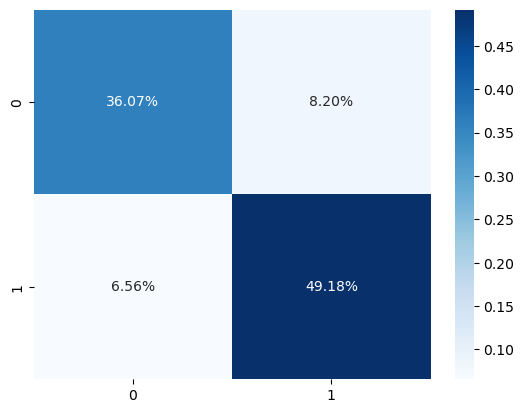

Accuracy is: 85.24590163934425


In [52]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(xtrain, ytrain)

# Predict on the test set
y_predict_logistic = logistic_model.predict(xtest)

# Compute confusion matrix
cm_logistic = confusion_matrix(ytest, y_predict_logistic)

# Plot confusion matrix
sns.heatmap(cm_logistic/np.sum(cm_logistic), annot=True, fmt=".2%", cmap='Blues')
plt.show()

# Calculate accuracy
ac_logistic = accuracy_score(ytest, y_predict_logistic)
print('Accuracy is:', ac_logistic * 100)


RandomForestClassifier **model**

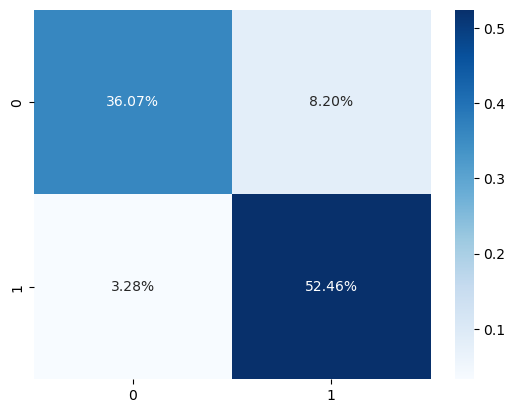

Accuracy is:  88.52459016393442


In [60]:
model = RandomForestClassifier(max_depth=5)
model.fit(xtrain, ytrain)
y_predict = model.predict(xtest)
cm = confusion_matrix(ytest, y_predict)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Blues')
plt.show()
ac = accuracy_score(ytest,y_predict)
print('Accuracy is: ',ac*100)

## **AdaBoostClassifier model**

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


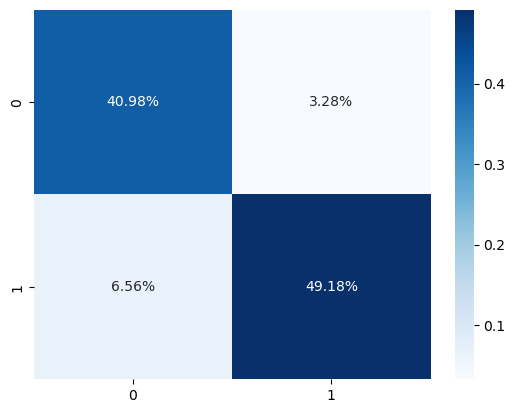

Accuracy is:  90.1639344262295


In [64]:
model = AdaBoostClassifier()

# Fit the model to the training data
model.fit(xtrain, ytrain)

# Predict the target values for the test data
y_predict = model.predict(xtest)

# Compute the confusion matrix
cm = confusion_matrix(ytest, y_predict)

# Visualize the confusion matrix
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='Blues')
plt.show()
ac = accuracy_score(ytest,y_predict)
print('Accuracy is: ',ac*100)

## **GradientBoostingClassifier model**

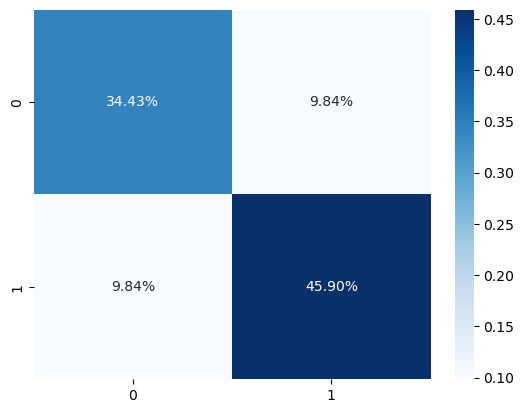

Accuracy is:  80.32786885245902


In [72]:
model = GradientBoostingClassifier()

# Fit the model to the training data
model.fit(xtrain, ytrain)

# Predict the target values for the test data
y_predict = model.predict(xtest)

# Compute the confusion matrix
cm = confusion_matrix(ytest, y_predict)

# Visualize the confusion matrix
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='Blues')
plt.show()

# Calculate and print the accuracy
ac = accuracy_score(ytest, y_predict)
print('Accuracy is: ', ac * 100)

## **DecisionTreeClassifier model**

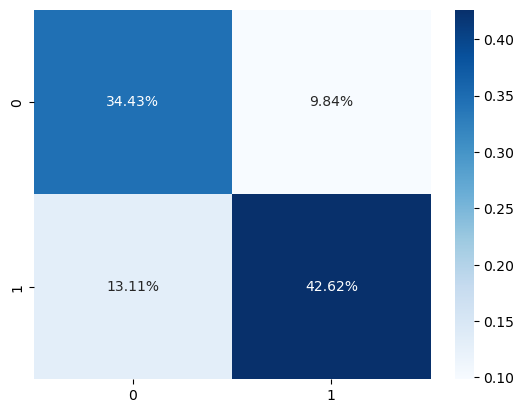

Accuracy is:  77.04918032786885


In [74]:
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(xtrain, ytrain)

# Predict the target values for the test data
y_predict = model.predict(xtest)

# Compute the confusion matrix
cm = confusion_matrix(ytest, y_predict)

# Visualize the confusion matrix
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='Blues')
plt.show()

# Calculate and print the accuracy
ac = accuracy_score(ytest, y_predict)
print('Accuracy is: ', ac * 100)

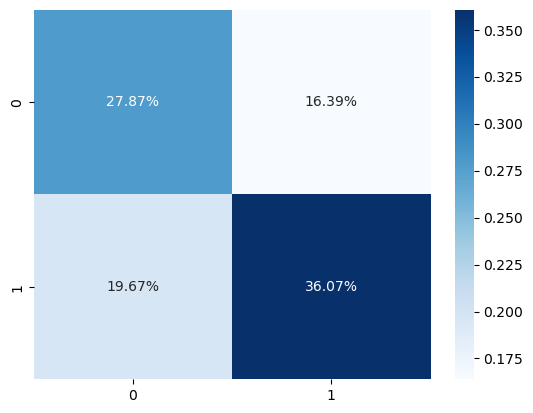

Accuracy is:  63.934426229508205


In [76]:
model = KNeighborsClassifier()

# Fit the model to the training data
model.fit(xtrain, ytrain)

# Predict the target values for the test data
y_predict = model.predict(xtest)

# Compute the confusion matrix
cm = confusion_matrix(ytest, y_predict)

# Visualize the confusion matrix
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='Blues')

plt.show()

# Calculate and print the accuracy
ac = accuracy_score(ytest, y_predict)
print('Accuracy is: ', ac * 100)

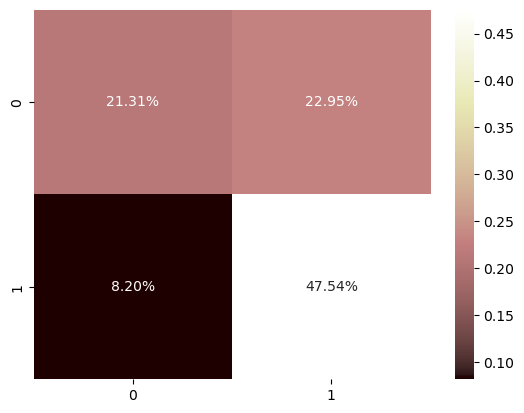

Accuracy is:  68.85245901639344


In [78]:
model = SVC()

# Fit the model to the training data
model.fit(xtrain, ytrain)

# Predict the target values for the test data
y_predict = model.predict(xtest)

# Compute the confusion matrix
cm = confusion_matrix(ytest, y_predict)

# Visualize the confusion matrix
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='pink')
plt.show()

# Calculate and print the accuracy
ac = accuracy_score(ytest, y_predict)
print('Accuracy is: ', ac * 100)

In [82]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

